In [9]:
import sys
sys.path.append('..')
from test_dali import LSTM, Mat, LSTMState, StackedLSTM

import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = LSTMState(Mat([1,2,3]), Mat([4,2,1]))
print(s.dtype)
print(s.memory.w)
print(s.hidden.w)

float32
[[ 1.  2.  3.]]
[[ 4.  2.  1.]]


In [3]:
l = LSTM(2, 5)

In [4]:
i = Mat([[1, 2]])
h = l.initial_states()
print(i.__repr__())
print(h.hidden.__repr__())
print(h.memory.__repr__())
h = l.activate(i, h)
print(h.hidden.__repr__())
print(h.memory.__repr__())

[
    [  1.000   2.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [  0.034   0.088  -0.178   0.156   0.099]
]

[
    [  0.088   0.256  -0.427   0.270   0.175]
]



In [5]:
print("Activate sequence for 3 different inputs states and one hidden states")
r1 = l.activate_sequence([Mat(3, 2) for i in range(10)], l.initial_states()).memory
print(r1.w)
print("Activate sequence for 3 different hidden states and three different inputs")
r2 = l.activate_sequence([Mat(3, 2) for i in range(10)], LSTMState(Mat(3,5), Mat(3,5))).memory
print(r2.w)
print("Activate sequence for 3 different hidden states and one input (!)")
r3 = l.activate_sequence([Mat(1, 2) for i in range(10)], LSTMState(Mat(3,5), Mat(3,5))).memory
print(r3.w)

Activate sequence for 3 different inputs states and one hidden states
[[ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]
 [ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]
 [ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]]
Activate sequence for 3 different hidden states and three different inputs
[[ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]
 [ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]
 [ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]]
Activate sequence for 3 different hidden states and one input (!)
[[ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]
 [ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]
 [ 0.26741028  0.26953137  0.00224128 -0.20896104 -0.00707232]]


In [6]:
INPUTS = [2,3]
HIDDEN_SIZE = 5
NUM_CHILDREN = 3
l = LSTM(INPUTS, HIDDEN_SIZE, NUM_CHILDREN, memory_feeds_gates=True)

In [7]:
idx = random.randint(0, len(l.parameters()) - 1)
print(l.cell_layer)
print(l.forget_layers)
print(l.hidden_size)
print(l.input_sizes)
print(l.input_layer)
print(l.num_children)
print(l.memory_feeds_gates)
print(l.parameters()[idx].w)
l_pickled = pickle.loads(pickle.dumps(l))
print("==== PICKLED ====")

print(l_pickled.cell_layer)
print(l_pickled.forget_layers)
print(l_pickled.hidden_size)
print(l_pickled.input_sizes)
print(l_pickled.input_layer)
print(l_pickled.num_children)
print(l_pickled.memory_feeds_gates)
print(l_pickled.parameters()[idx].w)

<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
[<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>]
5
[2, 3]
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
3
True
[[-0.14056322  0.20734197  0.21508116  0.11263621 -0.19408099]
 [ 0.10434964  0.20806834  0.08814898  0.1194793   0.19214448]
 [ 0.02305275  0.11441574  0.1395776   0.05164564  0.14230883]
 [-0.03978263  0.00561874  0.20305613  0.02860758  0.08776888]
 [-0.05105552  0.00259291 -0.04615346 -0.17697047  0.01897539]]
==== PICKLED ====
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
[<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>]
5
[2, 3]
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
3
True
[[-0.14056322  0.20734197  0.21508116  0.11263621 -0.19408099]
 [ 0.10434964  0.20806834  0.08814898  0.1194793   0.19214448]
 [ 0.02305275  0.11441574  0.1395776   0

In [10]:
hs = [l.initial_states() for _ in range(NUM_CHILDREN)]
i = [Mat(1, ipt) for ipt in INPUTS]

h_combined = l.activate(i, hs)
print(h_combined.hidden.__repr__())
print(h_combined.memory.__repr__())

[
    [  0.043   0.034  -0.013   0.024  -0.022]
]

[
    [  0.082   0.067  -0.025   0.045  -0.048]
]



In [11]:
l.Wcells_to_forgets[0]

[
    [ -0.412  -0.326  -0.169  -0.220  -0.349]
]

In [12]:
x = StackedLSTM([1,2], [5,4])

In [13]:
new_state = x.activate([
    Mat([[1]]),
    Mat([[1],[2]])
],
x.initial_states(),
0.5
)

TypeError: Cannot convert list to test_dali.LSTMState

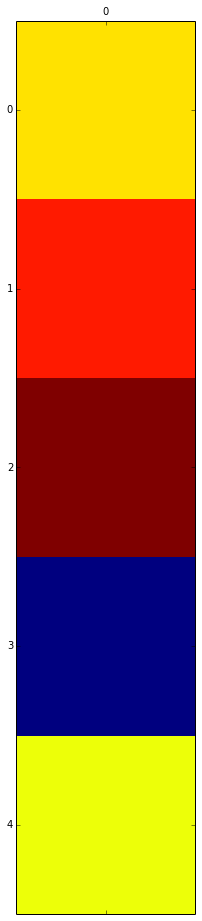

In [29]:
plt.matshow(x.cells[0].forget_layers[0].matrices[0].w)

In [33]:
?l.activate_sequence